# Ethereum Tracker

Tracking and visualising past and feature analytics of Ethereum.  
By: Mathushan Shanthan

## Objectives:

- Track Ethereum Closing Price Over Time
- Calculate Ethereum Predicted Closing Price Over Time ( Using LSTM )
- Predict Ethereum Closing Price Until 2025 ( Using SARIMA )

## Step 1: Import the Required Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML


## Step 2: Import Data

In [2]:
# Step 2: Load the data
df = pd.read_csv('coin_Ethereum.csv')
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


## Step 3: Explore and Clean the Data

In [3]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
display(HTML(df.head().to_html()))

# Display data types of each column
print("\nData types of columns:")
display(HTML(df.dtypes.to_frame().to_html()))

# Display summary statistics
print("\nSummary statistics:")
display(HTML(df.describe().to_html()))

# Check for missing values
print("\nMissing values:")
missing_values_table = df.isnull().sum().to_frame(name='Missing Values')
display(HTML(missing_values_table.to_html()))


First few rows of the DataFrame:


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07



Data types of columns:


,0
SNo,int64
Name,object
Symbol,object
Date,object
High,float64
Low,float64
Open,float64
Close,float64
Volume,float64
Marketcap,float64



Summary statistics:


,SNo,High,Low,Open,Close,Volume,Marketcap
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03
mean,1080.500000,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10
std,623.682612,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,540.750000,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09
50%,1080.500000,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10
75%,1620.250000,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10
max,2160.000000,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11



Missing values:


,Missing Values
SNo,0
Name,0
Symbol,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Marketcap,0


## Step 4: Data Visualization

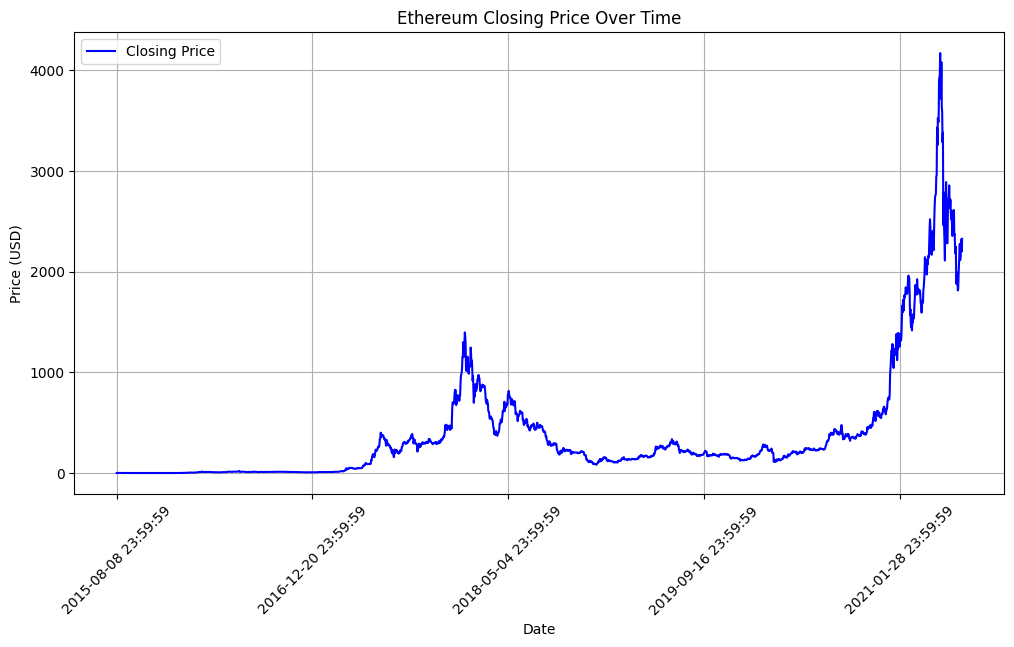

In [4]:
# Line plot of Ethereum's closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Ethereum Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(df['Date'][::500], rotation=45)  # Show x-axis labels every 500 data points
plt.legend()
plt.grid(True)
plt.show()

## Predicting Closing Prices

## Step 1: Prepare the Data


1.1 Normalize the Data:

In this part, I've applied data normalization to the 'Close' prices of the Ethereum dataset. Normalization is a crucial step in preparing the data for time series forecasting. By scaling the data between 0 and 1, I ensure that all the data points are on the same scale, which is essential for training machine learning models. To achieve this:

- I imported the MinMaxScaler from the scikit-learn library.
Then, I created an instance of the scaler, which allows me to apply the scaling transformation.
Using the scaler, I transformed the 'Close' prices and created a new column called 'Close_scaled' to store the normalized values. This 'Close_scaled' column will be used as input data for the forecasting model.
By normalizing the data, I've made sure that the model won't be biased by different scales in the input features, which is a common best practice in data preprocessing for machine learning.

1.2 Create Sequences:

In this part, I've generated sequences of data that will serve as input and target pairs for training the time series forecasting model. These sequences capture the temporal dependencies in the data, allowing the model to learn patterns over time. Here's how I did it:

- I defined a Python function called create_sequences that takes the normalized data and a seq_length parameter as inputs.
Inside the function, I iterated through the data, creating sequences of length seq_length as the input data and the next data point as the target value.
I stored these input-target pairs, which I call 'sequences,' in a list.
I set the 'sequence_length' variable to 10, meaning that I'm creating sequences of 10 consecutive data points. These sequences will help the forecasting model understand how past data points relate to future data points, improving its ability to make accurate predictions.

In [5]:
#1.1 Normalize the Data:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Close_scaled'] = scaler.fit_transform(df[['Close']])

In [6]:
#1.2 Create Sequences:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data)-seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length:i+seq_length+1]
        sequences.append((seq, target))
    return sequences

sequence_length = 10
sequences = create_sequences(df['Close_scaled'], sequence_length)

## Step 2: Split Data into Training and Testing Sets

In this step, I've divided the sequences of data created in Step 1 into two subsets: a training set and a testing set. This division allows me to train the model on a portion of the data and then evaluate its performance on unseen data to ensure it can make accurate predictions. Here's how I did it:
- I imported the train_test_split function from scikit-learn, which is a common library for machine learning tasks.  
- Using the zip(*sequences) operation, I separated the sequences into two parts: X, representing the input sequences, and y, representing the target values (the next data points to predict).  
- I then used train_test_split to split both X and y into training and testing sets. I specified that I wanted to allocate 20% of the data for testing (test_size=0.2).  
- To maintain the temporal order of the data, I set shuffle=False, ensuring that the sequences are not shuffled randomly during the split. This is crucial for time series data since the order of data points matters.  
   
By splitting the data this way, I can train the model on the training set and then assess its ability to make accurate predictions on unseen data (the testing   
set). This evaluation step is essential to gauge how well the model generalizes to new observations and whether it can effectively forecast Ethereum closings.rices.rices.

In [7]:
from sklearn.model_selection import train_test_split

X, y = zip(*sequences)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


## Step 3: Build and Train the LSTM Model

In this step, I created a deep learning model using TensorFlow and Keras to perform time series forecasting. Here's a breakdown of the key steps:

- I imported the necessary libraries, including TensorFlow and its high-level API, Keras.

- I defined the model architecture using the tf.keras.Sequential API. This model consists of two layers:
  
The first layer is an LSTM layer with 50 units and a ReLU activation function. This layer is designed to capture temporal dependencies and patterns in the input sequences. The input_shape parameter specifies the shape of the input data, which is (sequence_length, 1) since we're dealing with sequences of length sequence_length with one feature per time step.
The second layer is a dense layer with a single unit, which serves as the output layer. This layer predicts the next closing price value based on the LSTM's internal representation of the input sequence.
- I compiled the model using the Adam optimizer and mean squared error (MSE) as the loss function. MSE is a common choice for regression problems, including time series forecasting.

- I converted the training data (X_train and y_train) to TensorFlow tensors using tf.convert_to_tensor. This is necessary to ensure compatibility with the TensorFlow model.

- Finally, I trained the model using the training data for 50 epochs with a batch size of 64. During training, the model learns to make predictions based on the input sequences and adjusts its internal parameters to minimize the mean squared error between the predicted and actual closing prices.
  
This LSTM-based model is capable of learning complex patterns in the time series data and can be trained to make accurate predictions of Ethereum closing prices. The training process involves iteratively updating the model's weights and biases to improve its forecasting performance.

In [8]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)

model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
27/27 [==============================] - 1s 3ms/step - loss: 0.0034
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 7.0959e-04
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 9.8999e-05
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 8.6046e-05
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 8.0634e-05
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 7.9330e-05
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 8.1222e-05
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 8.0146e-05
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 7.7550e-05
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 7.5204e-05
Epoch 11/50
27/27 [==============================] - 0s 3ms/step - loss: 7.6870e-05
Epoch 12/50
27/27 [==============================] - 0s 3ms/step - loss: 7.3975e-05
Epoch

## Step 4: Make Predictions

In this step, I used the trained LSTM model to make predictions on the testing data. Here's a breakdown of the key steps:

- I converted the testing data X_test to TensorFlow tensors using tf.convert_to_tensor. This step ensures that the input data is in the appropriate format for feeding into the model.

- Using the model.predict method, I made predictions on the testing data. Specifically, I passed the X_test as input to the model, and the model generated predictions for the closing prices.

- The predicted values are stored in the y_pred variable. These predictions represent the model's forecasted closing prices for the testing period.
  
By making predictions on the testing data, I assessed how well the trained LSTM model generalizes to unseen data. The predicted values in y_pred can be compared to the actual closing prices in the testing set (y_test) to evaluate the model's performance and accuracy in forecasting Ethereum closing prices. This step is crucial for validating the effectiveness of the model and determining whether it can provide reliable predictions for future closing prices.

In [9]:
X_test = tf.convert_to_tensor(X_test)
y_pred = model.predict(X_test)


14/14 [==============================] - 0s 1ms/step


## Step 5: Inverse Transform Predictions

In this step, I reversed the earlier data normalization process to obtain predictions in the original scale of Ethereum closing prices. Here's a breakdown of the key steps:

- I used the scaler.inverse_transform method, which is the inverse operation of the data normalization process applied in Step 1.

- Specifically, I applied the inverse transformation to the model's predictions y_pred. These predictions were initially scaled between 0 and 1 in Step 1 to facilitate training, but now I'm converting them back to their original scale.

- The result is stored in the y_pred_inverse variable, which contains the model's Ethereum closing price forecasts in their original, real-world values.
  
By performing this inverse transformation, I've ensured that the model's predictions are presented in the same scale as the actual Ethereum closing prices, making them directly interpretable and usable for making investment decisions or any other analysis. This step is essential to provide meaningful predictions to stakeholders or users of the forecasting model.

In [10]:
y_pred_inverse = scaler.inverse_transform(y_pred)

## Step 6: Evaluate the Model

In this step, I assessed how well the LSTM model performs in predicting Ethereum closing prices and quantified its accuracy using the mean squared error (MSE). Here's a breakdown of the key steps:

- I imported the mean_squared_error function from scikit-learn, which is a widely used metric for evaluating regression models, including time series forecasting models.

- I obtained the actual Ethereum closing prices from the testing set (y_test) in their original scale by applying the inverse transformation using scaler.inverse_transform. This step is necessary to have the actual values in the same scale as the model's predictions.

- I calculated the mean squared error (MSE) by comparing the actual closing prices (y_true) to the model's predictions in their original scale (y_pred_inverse). The MSE measures the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance and more accurate predictions.
  
The resulting MSE value quantifies how well the LSTM model performs in forecasting Ethereum closing prices. It serves as a measure of prediction accuracy, and lower MSE values indicate that the model's predictions are closer to the actual prices, suggesting a more accurate forecasting model. This evaluation step is crucial for assessing the model's reliability and determining its suitability for making future price predictions.

In [11]:
from sklearn.metrics import mean_squared_error

y_true = scaler.inverse_transform(y_test)
mse = mean_squared_error(y_true, y_pred_inverse)


## Step 7: Visualize the Predictions

In this step, I created a line plot to visualize the Ethereum closing price predictions made by the LSTM model and compared them to the actual closing prices over time. Here's a breakdown of the key steps:

- I converted the 'Date' column in the original dataset (df) to a datetime data type to ensure that the x-axis of the plot displays dates correctly.

- I used the matplotlib.pyplot library to create a line plot. Inside the plot:

- I plotted the true Ethereum closing prices (y_true) as blue markers ('x') and labeled them as "True Closing Prices."
- I plotted the predicted Ethereum closing prices (y_pred_inverse) as red dashed lines ('--') and labeled them as "Predicted Closing Prices."
- I set the title of the plot to "Ethereum Closing Price Prediction" to provide context.
- I labeled the x-axis as "Date" and the y-axis as "Price (USD)."
- I included a legend to differentiate between true and predicted prices.
- I added grid lines to enhance readability.  
This visualization allows you to compare the model's predictions to the actual closing prices visually. By plotting both the true and predicted values on the same graph, you can assess how well the model captures the underlying patterns and trends in the Ethereum closing prices. It provides a clear representation of the model's performance and its ability to make accurate forecasts.

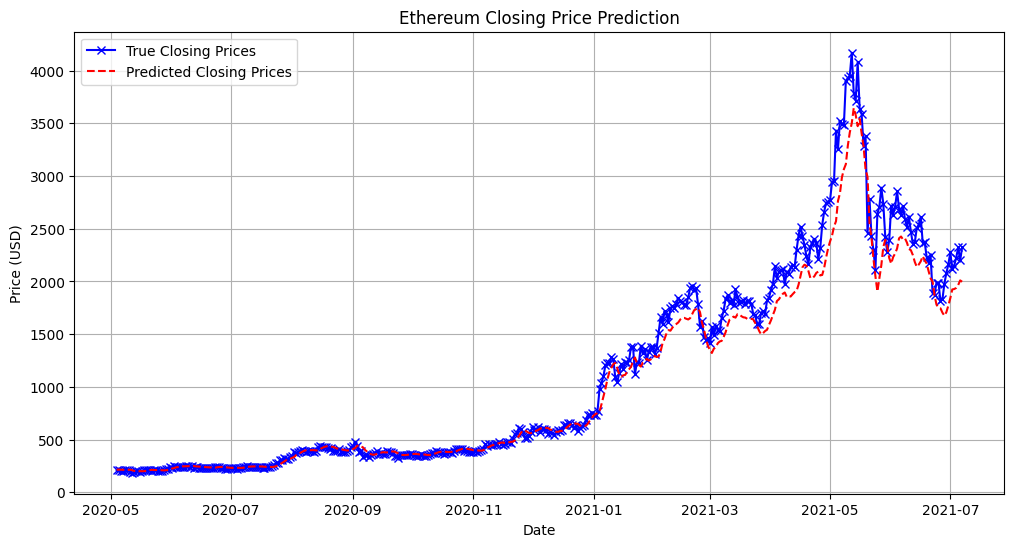

In [12]:
# Convert the 'Date' column to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Line plot of Ethereum's closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][-len(y_true):], y_true, label='True Closing Prices', color='blue', marker='x')
plt.plot(df['Date'][-len(y_true):], y_pred_inverse, label='Predicted Closing Prices', color='red', linestyle='--')
plt.title('Ethereum Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()




## Predict the Ethereum closing price from 2021-07-06 to 2025-01-01

I have implemented the prediction of Ethereum's closing price from 2021-07-06 to 2025-01-01 using a SARIMA (Seasonal Autoregressive Integrated Moving Average) model.  
  
Step 1: Prepare the Environment  
- I imported the necessary libraries to work with data and implement time series forecasting, including pandas, numpy, matplotlib, and the SARIMAX model from statsmodels.
Step 2: Load and Prepare the Data

- I loaded the Ethereum price data from a CSV file using pandas. The data includes columns like 'Date' and 'Close', with 'Date' being in a datetime format.

- I made sure that the 'Date' column is set as the index, which is essential for time series analysis.

- To focus on the period I'm interested in (from 2015-08-08 to 2021-07-06), I filtered the data accordingly.

Step 3: Select the Target Data

- I selected the 'Close' column, which contains Ethereum's closing prices. This column will be the focus of my analysis and will be used for training the forecasting model.
Step 4: Build and Train the SARIMA Model

- I specified the order and seasonal order for the SARIMA model. These parameters capture the time series patterns and seasonality in the data. In this case, I've used SARIMA(1,1,1)(1,1,1,12) as the initial configuration.

- I created a SARIMAX model object and fitted it to the historical Ethereum closing prices. This step involves training the model to learn from the past data.

Step 5: Forecast Ethereum Closing Prices

- I calculated the number of days in the future period I want to forecast, which is from 2021-07-06 to 2025-01-01.

- Leveraging the trained SARIMA model, I obtained a forecast for Ethereum's closing prices for this future period. This step is where the model's predictive power is put into action.

Step 6: Visualize the Results

- I converted the forecasted data into a plot to visualize the predictions.

- In the plot, I compared the actual Ethereum closing prices (shown in green) with the forecasted prices (shown in blue). This visual comparison allows me to see how well the model's predictions align with actual data.

- Additionally, I shaded the region between the upper and lower prediction intervals in pink, providing a visual representation of the forecast uncertainty.

- I added labels, a title, and a legend to make the plot informative and easy to interpret.

Overall, this code takes you through the entire process of time series forecasting, from data preparation and model training to visualizing the forecasted Ethereum closing prices. It allows you to gain insights into future price trends, aiding in decision-making and investment strategies.

C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


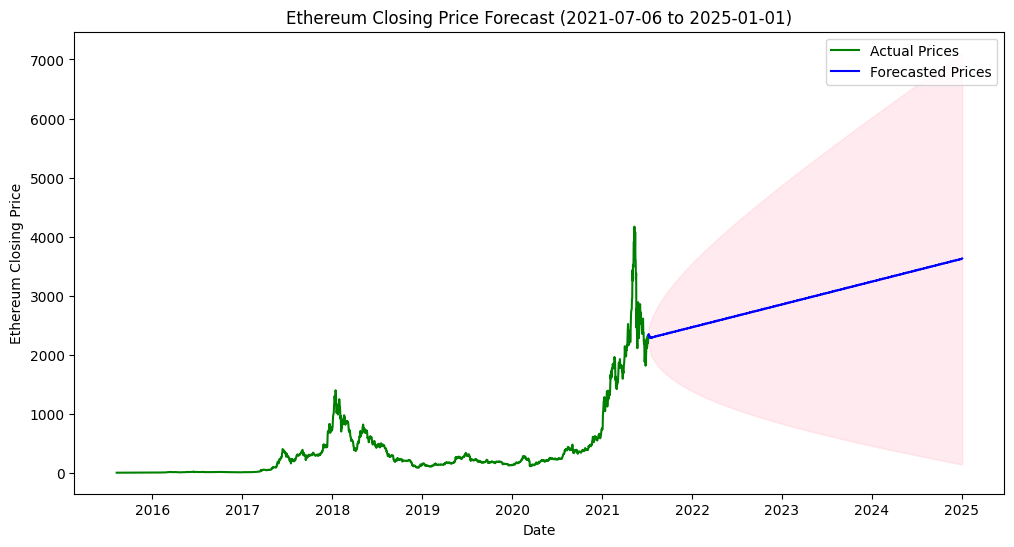

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
data = pd.read_csv('coin_Ethereum.csv')

# Convert the 'Date' column to a datetime object and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Filter the data for the desired date range (2015-08-08 to 2021-07-06)
start_date = '2015-08-08'
end_date = '2021-07-06'
data = data[start_date:end_date]

# Select the 'Close' column for modeling
ethereum_close = data['Close']

# Fit the SARIMA model
sarima_order = (1, 1, 1)  # You can adjust these order values based on model diagnostics
sarima_seasonal_order = (1, 1, 1, 12)  # Seasonal order (assuming monthly data)

sarima_model = SARIMAX(ethereum_close, order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Forecast Ethereum closing prices for the desired future period (2021-07-06 to 2025-01-01)
forecast_periods = (pd.to_datetime('2025-01-01') - pd.to_datetime('2021-07-06')).days  # Number of days in the forecast
forecast = sarima_fit.get_forecast(steps=forecast_periods)

# Get the forecasted values and prediction intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the actual vs. forecasted Ethereum closing prices
plt.figure(figsize=(12, 6))
plt.plot(ethereum_close.index, ethereum_close.values, label='Actual Prices', color='green')
plt.plot(forecast_values.index, forecast_values.values, label='Forecasted Prices', color='blue')
plt.fill_between(forecast_values.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Ethereum Closing Price')
plt.title('Ethereum Closing Price Forecast (2021-07-06 to 2025-01-01)')
plt.legend()
plt.show()
